### Import Libraries

In [34]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score,classification_report,confusion_matrix

import pickle
import json

### Problem Statement

1. Marital status                         : The marital status of the student. (Categorical)
2. Application mode                       : The method of application used by the student. (Categorical)
3. Application order                      : The order in which the student applied. (Numerical)
4. Course                                 : The course taken by the student. (Categorical)
5. Daytime/evening attendance             : Whether the student attends classes during the day or in the evening. (Categorical)
6. Previous qualification                 :The qualification obtained by the student before enrolling in higher education. (Categorical)
7. Nacionality                            :The nationality of the student. (Categorical)
8. Mother's qualification                 :The qualification of the student's mother. (Categorical)
9. Father's qualification                 :The qualification of the student's father. (Categorical)
10.Mother's occupation                    :The occupation of the student's mother. (Categorical)
11.Father's occupation                    :The occupation of the student's father. (Categorical)
12.Displaced                              :Whether the student is a displaced person. (Categorical)
13.Educational special needs              :Whether the student has any special educational needs. (Categorical)
14.Debtor                                 :Whether the student is a debtor. (Categorical)
15.Tuition fees up to date                :Whether the student's tuition fees are up to date. (Categorical)
16.Gender                                 :The gender of the student. (Categorical)
17.Scholarship holder                     :Whether the student is a scholarship holder. (Categorical)
18.Age at enrollment                      :The age of the student at the time of enrollment. (Numerical)
19.International                          :Whether the student is an international student. (Categorical)
20.Curricular units 1st sem (credited)    :The number of curricular units credited by the student in the first semester. (Numerical)
21.Curricular units 1st sem (enrolled)    :The number of curricular units enrolled by the student in the first semester. (Numerical)
22.Curricular units 1st sem (evaluations) :The number of curricular units evaluated by the student in the first semester. (Numerical)
23.Curricular units 1st sem (approved)    :The number of curricular units approved by the student in the first semester. (Numerical)

### Data Gathering

In [35]:
df = pd.read_csv("student_data.csv")
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mother_occupation,...,Curricula_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Nacionality                                   4424 non-null   int64  
 7   Mothers_qualification                         4424 non-null   int64  
 8   Fathers_qualification                         4424 non-null   int64  
 9   Mother_occupation                             4424 non-null   i

In [37]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mother_occupation                               0
Father_occupation                               0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees                                    0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0
International                                   0
Curricular_units_1st_sem_credited               0


In [38]:
df = df[df.Target != "Enrolled"]

In [39]:
df.Target.value_counts().to_dict()

{'Graduate': 2209, 'Dropout': 1421}

In [40]:
2209 /(2209+1421)

0.6085399449035813

In [41]:
df["Target"].replace({'Graduate': 1, 'Dropout': 0},inplace = True)
df["Target"]

C:\Users\91880\AppData\Local\Temp\ipykernel_28420\959254670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"].replace({'Graduate': 1, 'Dropout': 0},inplace = True)


0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

In [60]:
df.Marital_status.value_counts()

1    3199
2     327
4      75
5      22
6       5
3       2
Name: Marital_status, dtype: int64

In [61]:
df["Application_mode"].value_counts()

1     1408
8      713
12     664
14     237
15     157
4      132
9      108
13      66
16      46
7       30
17      25
6       20
5       10
3        8
2        3
18       1
10       1
11       1
Name: Application_mode, dtype: int64

In [62]:
df["Application_order"].value_counts()

1    2461
2     451
3     249
4     218
5     129
6     121
0       1
Name: Application_order, dtype: int64

In [63]:
df["Gender"].value_counts()

0    2381
1    1249
Name: Gender, dtype: int64

In [65]:
df["Nacionality"].value_counts()

1     3544
14      32
9       12
12       9
3        8
10       5
4        3
18       3
17       2
16       2
2        2
11       1
15       1
5        1
21       1
8        1
6        1
7        1
19       1
Name: Nacionality, dtype: int64

In [42]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mother_occupation,...,Curricula_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,18.000000,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


In [43]:
df.columns


Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
       'Mothers_qualification', 'Fathers_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees ', 'Gender', 'Scholarship_holder', 'Age_at_enrollment',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_1st_sem_Enrolled ', 'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_unit_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricula_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target'],
      dtype='ob

In [44]:
x = df.drop("Target", axis = 1)
y = df["Target"]

In [45]:
#smote 

smote = SMOTE(k_neighbors=5,sampling_strategy=0.8,random_state=5)
x_sampled, y_sampled = smote.fit_resample(x,y)
y_sampled.value_counts()

1    2209
0    1767
Name: Target, dtype: int64

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,random_state= 11,test_size=0.3,stratify= y_sampled)

In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

D:\Program Installation\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
train_score = log_reg.score(x_train,y_train)
train_score

0.9173553719008265

In [49]:
test_score = log_reg.score(x_test,y_test)
test_score

0.9069572506286673

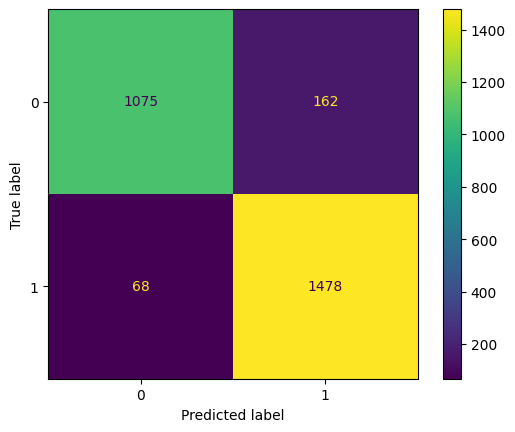

In [50]:
ConfusionMatrixDisplay.from_estimator(log_reg,x_train,y_train)

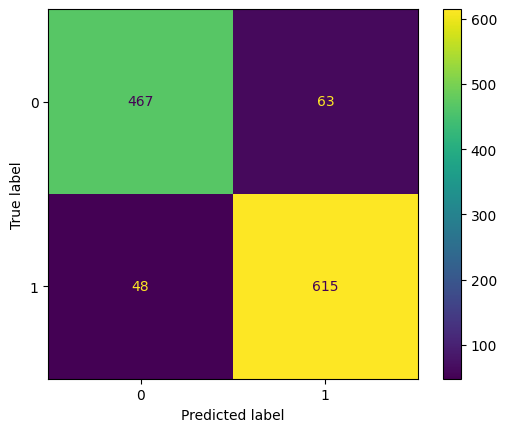

In [51]:
ConfusionMatrixDisplay.from_estimator(log_reg,x_test,y_test)

### Model Evaluation

In [52]:
y_pred = log_reg.predict(x_train)

con_mat = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :: \n",con_mat)

acc_score = accuracy_score(y_train, y_pred)
print("Accuracy Score :: ",acc_score)

clf_report = classification_report(y_train,y_pred)
print("Classification Report ::\n",clf_report)

recall = recall_score(y_train,y_pred)
print("Recall Score ::",recall)

pre = precision_score(y_train, y_pred)
print("Precision Score ::",pre)


Confusion Matrix :: 
 [[1075  162]
 [  68 1478]]
Accuracy Score ::  0.9173553719008265
Classification Report ::
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1237
           1       0.90      0.96      0.93      1546

    accuracy                           0.92      2783
   macro avg       0.92      0.91      0.92      2783
weighted avg       0.92      0.92      0.92      2783

Recall Score :: 0.9560155239327296
Precision Score :: 0.901219512195122


In [53]:
y_pred_test = log_reg.predict(x_test)

con_mat = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :: \n",con_mat)

acc_score = accuracy_score(y_test, y_pred_test)
print("Accuracy Score :: ",acc_score)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report ::\n",clf_report)

recall = recall_score(y_test,y_pred_test)
print("Recall Score ::",recall)

pre = precision_score(y_test, y_pred_test)
print("Precision Score ::",pre)


Confusion Matrix :: 
 [[467  63]
 [ 48 615]]
Accuracy Score ::  0.9069572506286673
Classification Report ::
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       530
           1       0.91      0.93      0.92       663

    accuracy                           0.91      1193
   macro avg       0.91      0.90      0.91      1193
weighted avg       0.91      0.91      0.91      1193

Recall Score :: 0.9276018099547512
Precision Score :: 0.9070796460176991


### KNN Classifier

In [54]:
# K = np.arange(1,11)
# P = np.arange(1,3)

knn_clf = KNeighborsClassifier(n_neighbors= 5, p = 1)
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(p=1)

In [55]:
y_pred_train = knn_clf.predict(x_train)

con_mat = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :: \n",con_mat)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :: ",acc_score)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report ::\n",clf_report)

recall = recall_score(y_train,y_pred_train)
print("Recall Score ::",recall)

pre = precision_score(y_train, y_pred_train)
print("Precision Score ::",pre)


Confusion Matrix :: 
 [[1017  220]
 [  48 1498]]
Accuracy Score ::  0.903701042040963
Classification Report ::
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      1237
           1       0.87      0.97      0.92      1546

    accuracy                           0.90      2783
   macro avg       0.91      0.90      0.90      2783
weighted avg       0.91      0.90      0.90      2783

Recall Score :: 0.9689521345407504
Precision Score :: 0.8719441210710128


In [56]:
y_pred = knn_clf.predict(x_test)

con_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :: \n",con_mat)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score :: ",acc_score)

clf_report = classification_report(y_test,y_pred)
print("Classification Report ::\n",clf_report)

recall = recall_score(y_test,y_pred)
print("Recall Score ::",recall)

pre = precision_score(y_test, y_pred)
print("Precision Score ::",pre)


Confusion Matrix :: 
 [[388 142]
 [ 43 620]]
Accuracy Score ::  0.8449287510477788
Classification Report ::
               precision    recall  f1-score   support

           0       0.90      0.73      0.81       530
           1       0.81      0.94      0.87       663

    accuracy                           0.84      1193
   macro avg       0.86      0.83      0.84      1193
weighted avg       0.85      0.84      0.84      1193

Recall Score :: 0.9351432880844646
Precision Score :: 0.8136482939632546


### Save File

In [57]:
with open(r"artifacts/logistic_reg.pkl","wb") as f:
    pickle.dump(log_reg,f)

#### COlumn

In [58]:
column_names = x.columns
project_data = {"Column Names": column_names.tolist()}

with open(r"artifacts/project_data.json","w") as f:
    json.dump(project_data,f)

#### smote

In [59]:
with open(r"artifacts/smote.pkl","wb") as f:
    pickle.dump(smote,f)